# Confidence Intervals

### Table of Contents

- [Building confidence intervals](#build_ci)

In [2]:
import os
os.chdir('projects_on_GitHub/POC/python_probability_practices')

<a id='build_ci'></a>
## Building Confidence Intervals

There is a file called `coffee_dataset.csv` which stores people's age, height and whether or not they're coffee drinkers.

In [6]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [16]:
np.random.seed(42)
coffee_red = coffee_full.sample(200)
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [17]:
drinker_prop = (coffee_red.drinks_coffee==True).mean()
drinker_prop

0.595

In [20]:
non_drinker_prop = (coffee_red.drinks_coffee==False).mean()
non_drinker_prop

0.405

In [21]:
print("{} -- coffee drinkers proportion in the sample.\n{} -- non-coffee drinkers proportion in the sample.".format(drinker_prop, \
                                                                                                                    non_drinker_prop))


0.595 -- coffee drinkers proportion in the sample.
0.405 -- non-coffee drinkers proportion in the sample.


`2.` Of the individuals who do not drink coffee, what is the average height?

In [24]:
h_mean_non = coffee_red[coffee_red.drinks_coffee==False].height.mean()
print("{:.2f} -- Avg. height for non-drinkers in the sample.".format(h_mean_non))

66.78 -- Avg. height for non-drinkers in the sample.


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [25]:
sample200 = coffee_red.sample(200, replace=True)

drinker_prop = (sample200.drinks_coffee==True).mean()
non_drinker_prop = 1 - drinker_prop

print("{} -- coffee drinkers proportion in the sample.\n{} -- non-coffee drinkers proportion in the sample.".format(drinker_prop, \
                                                                                                                    non_drinker_prop))


0.605 -- coffee drinkers proportion in the sample.
0.395 -- non-coffee drinkers proportion in the sample.


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample.  Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

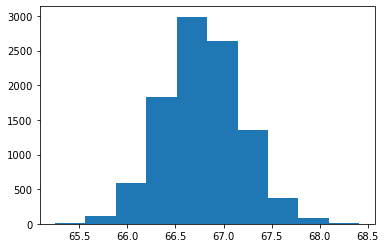

In [26]:
means_height = []
for _ in np.arange(10000):
    samples = coffee_red.sample(200, replace=True)
    mean_height = samples[samples.drinks_coffee==False].height.mean()
    means_height.append(mean_height)
    
plt.hist(means_height);   



___Comment:___ From above, it looks pretty normal.

In [27]:
# 95% confidence interval
np.percentile(means_height, 2.5), np.percentile(means_height, 97.5)

(65.9929132815752, 67.58402738281573)

In [32]:
# mean of sample means
mean_means_height = np.array(means_height).mean()
print("{:.2f} -- mean of sample means pf height.".format(mean_means_height))

66.78 -- mean of sample means pf height.


`5.`  Did your interval capture the actual average height of coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [30]:
# mean of height in the population
mean_h_pop = coffee_full[coffee_full.drinks_coffee==False].height.mean()

print("{:.2f} -- Avg. height of non-drinkers in the population.".format(mean_h_pop))

66.44 -- Avg. height of non-drinkers in the population.


___Comment:___ Yes, it's captured by our interval, but not the exact same as the sample mean.